In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
def accuracy_score(y_pred,y_true):
    score = np.sum(np.asarray(y_true) == np.asarray(y_pred))
    return score/len(y_true)

In [27]:
class LogisticRegression():
    def __init__(self, lr=0.001, epochs=100):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.random.randn(self.n)
        self.b = 0
        self.X = X
        self.y = y
        for i in range(self.epochs):
            self.weights_update()
        return self

    def weights_update(self):
        A = 1 / (1 + np.exp(- (self.X.dot(self.W) + self.b)))

        temp = (A - self.y.T).reshape(self.m)
        dW = self.X.T.dot(temp) / self.m
        db = np.sum(temp) / self.m

        self.W = self.W - self.lr * dW
        self.b = self.b - self.lr * db

        return self

    def predict_prob(self, X):
        prob = 1 / (1 + np.exp(- (X.dot(self.W) + self.b)))
        return prob

In [4]:
df = pd.read_csv("data/emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [24]:
X, y = df.iloc[:,1:-1], df.iloc[:,-1]
X_train = X.iloc[:4000].to_numpy()
y_train = y.iloc[:4000].to_numpy()

X_test = X.iloc[4000:].to_numpy()
y_test = y.iloc[4000:].to_numpy()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4000, 3000) (4000,) (1000, 3000) (1000,)


In [25]:
k = 5
distmat = distance_matrix(X_test, X_train)
x_min = distmat.argpartition(k-1, axis=1)[:,:k]
x_min = x_min.reshape(-1)
y_prob = y_train[x_min]
y_prob = y_prob.reshape(len(y_test),k)
y_prob = np.average(y_prob, axis=1)

fpr_knn, tpr_knn, _= roc_curve(np.asarray(y_test),y_prob)
auc_knn = auc(fpr_knn, tpr_knn)

In [28]:
model = LogisticRegression(lr=0.1, epochs=3000)
model.fit(X_train,y_train)
y_prob = model.predict_prob(X_test)

fpr_lr ,tpr_lr , _ = roc_curve(np.asarray(y_test),y_prob)
auc_lr = auc(fpr_lr ,tpr_lr )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


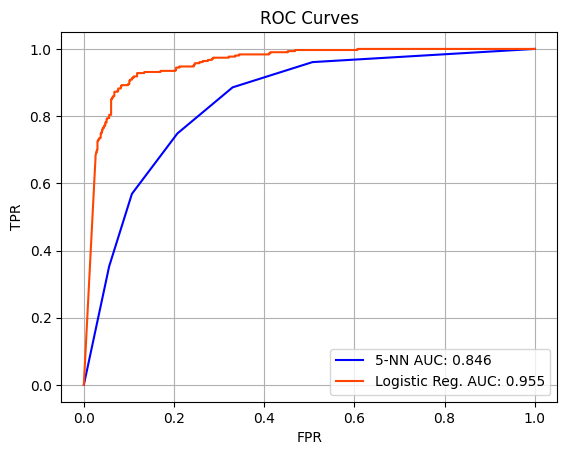

In [32]:
plt.plot(fpr_knn, tpr_knn, label=f"5-NN AUC: {np.round(auc_knn,3)}", c='blue')
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Reg. AUC: {np.round(auc_lr,3)}", c='orangered')
plt.grid(True)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves")
plt.legend()
plt.show()